In [3]:
# Import necessary libraries
import os
import numpy as np
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [12]:
# Define the path to your train, validation, and test data
train_folder = "../../src/data/train"
val_folder = "../../src/data/val"
test_folder = "../../src/data/test"

In [13]:
# Define the class names (subfolder names)
class_names = ['Monkeypox', 'Chickenpox', 'Normal', 'Measles']

In [14]:
# Function to load images from a given folder and class names
def load_data_from_folder(folder_path, class_names, image_size=(64, 64)):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            
            # Load the image using OpenCV
            image = cv2.imread(image_path)
            
            # Resize the image to a consistent size (e.g., 64x64)
            image = cv2.resize(image, image_size)
            
            # Flatten the image into a 1D array and normalize pixel values
            image = image.flatten() / 255.0
            
            # Append image data and label
            images.append(image)
            labels.append(class_name)
    
    # Convert to NumPy arrays
    X = np.array(images)
    y = np.array(labels)
    
    return X, y

In [15]:
# Step 1: Load the training, validation, and test data
X_train, y_train = load_data_from_folder(train_folder, class_names)
X_val, y_val = load_data_from_folder(val_folder, class_names)
X_test, y_test = load_data_from_folder(test_folder, class_names)

In [16]:
# Step 2: Encode labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [17]:
# Step 3: Define a function to evaluate classifiers and plot results
def evaluate_classifier_with_validation(classifier, classifier_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the validation set
    y_val_pred = classifier.predict(X_val)
    print(f"{classifier_name} - Validation Results:")
    print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))
    
    # Predict on the test set
    y_test_pred = classifier.predict(X_test)
    print(f"{classifier_name} - Test Results:")
    print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

    # Confusion Matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - Test Set ({classifier_name})")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Step 4: Define and evaluate multiple classifiers

Random Forest:
Random Forest - Validation Results:
              precision    recall  f1-score   support

  Chickenpox       0.00      0.00      0.00         5
     Measles       0.00      0.00      0.00         8
   Monkeypox       0.44      0.78      0.56        23
      Normal       0.75      0.58      0.65        26

    accuracy                           0.53        62
   macro avg       0.30      0.34      0.30        62
weighted avg       0.48      0.53      0.48        62

Random Forest - Test Results:
              precision    recall  f1-score   support

  Chickenpox       0.00      0.00      0.00        15
     Measles       0.00      0.00      0.00        23
   Monkeypox       0.51      0.90      0.65        50
      Normal       0.74      0.68      0.71        66

    accuracy                           0.58       154
   macro avg       0.31      0.40      0.34       154
weighted avg       0.48      0.58      0.52       154



/Users/pawankumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pawankumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pawankumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

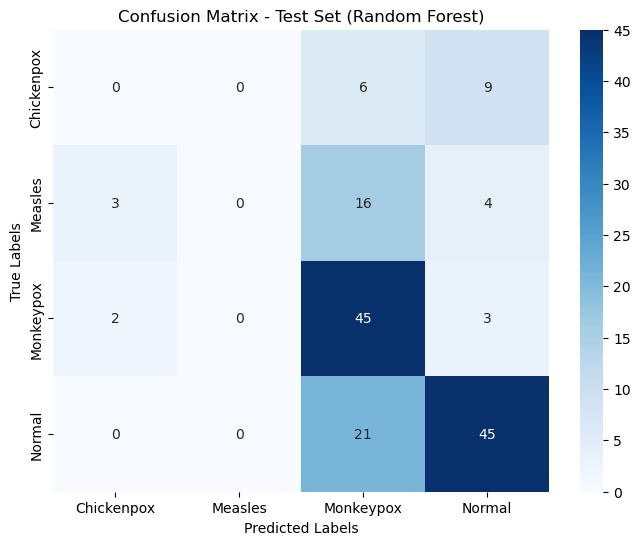

In [18]:
# 1. Random Forest
print("Random Forest:")
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_classifier_with_validation(random_forest_classifier, "Random Forest", X_train, y_train_encoded, X_val, y_val_encoded, X_test, y_test_encoded)


k-NN Classifier:
k-NN - Validation Results:
              precision    recall  f1-score   support

  Chickenpox       0.09      0.40      0.14         5
     Measles       0.33      0.12      0.18         8
   Monkeypox       0.48      0.70      0.57        23
      Normal       1.00      0.12      0.21        26

    accuracy                           0.35        62
   macro avg       0.48      0.33      0.28        62
weighted avg       0.65      0.35      0.33        62

k-NN - Test Results:
              precision    recall  f1-score   support

  Chickenpox       0.06      0.27      0.10        15
     Measles       0.15      0.09      0.11        23
   Monkeypox       0.51      0.70      0.59        50
      Normal       0.43      0.05      0.08        66

    accuracy                           0.29       154
   macro avg       0.29      0.27      0.22       154
weighted avg       0.38      0.29      0.25       154



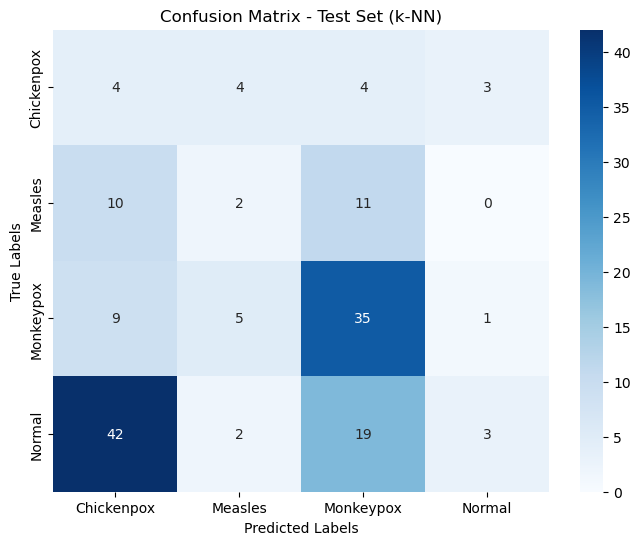

In [19]:
# 2. k-NN
print("k-NN Classifier:")
knn_classifier = KNeighborsClassifier(n_neighbors=5)
evaluate_classifier_with_validation(knn_classifier, "k-NN", X_train, y_train_encoded, X_val, y_val_encoded, X_test, y_test_encoded)

Support Vector Machine (SVM):
SVM - Validation Results:
              precision    recall  f1-score   support

  Chickenpox       0.20      0.60      0.30         5
     Measles       0.00      0.00      0.00         8
   Monkeypox       0.45      0.57      0.50        23
      Normal       0.56      0.35      0.43        26

    accuracy                           0.40        62
   macro avg       0.30      0.38      0.31        62
weighted avg       0.42      0.40      0.39        62

SVM - Test Results:
              precision    recall  f1-score   support

  Chickenpox       0.13      0.33      0.19        15
     Measles       0.00      0.00      0.00        23
   Monkeypox       0.51      0.60      0.55        50
      Normal       0.69      0.53      0.60        66

    accuracy                           0.45       154
   macro avg       0.33      0.37      0.33       154
weighted avg       0.47      0.45      0.45       154



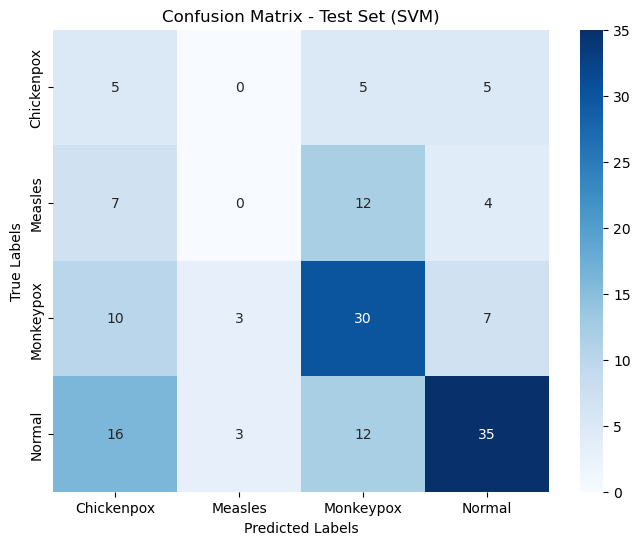

In [20]:
# 3. SVM
print("Support Vector Machine (SVM):")
svm_classifier = SVC(kernel='linear', random_state=42)
evaluate_classifier_with_validation(svm_classifier, "SVM", X_train, y_train_encoded, X_val, y_val_encoded, X_test, y_test_encoded)

XGBoost Classifier:


/Users/pawankumar/tensorflow-test/env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [22:56:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Validation Results:
              precision    recall  f1-score   support

  Chickenpox       0.00      0.00      0.00         5
     Measles       0.00      0.00      0.00         8
   Monkeypox       0.55      0.78      0.64        23
      Normal       0.86      0.73      0.79        26

    accuracy                           0.60        62
   macro avg       0.35      0.38      0.36        62
weighted avg       0.56      0.60      0.57        62

XGBoost - Test Results:
              precision    recall  f1-score   support

  Chickenpox       0.21      0.20      0.21        15
     Measles       0.00      0.00      0.00        23
   Monkeypox       0.50      0.78      0.61        50
      Normal       0.75      0.70      0.72        66

    accuracy                           0.57       154
   macro avg       0.37      0.42      0.39       154
weighted avg       0.51      0.57      0.53       154



/Users/pawankumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pawankumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pawankumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

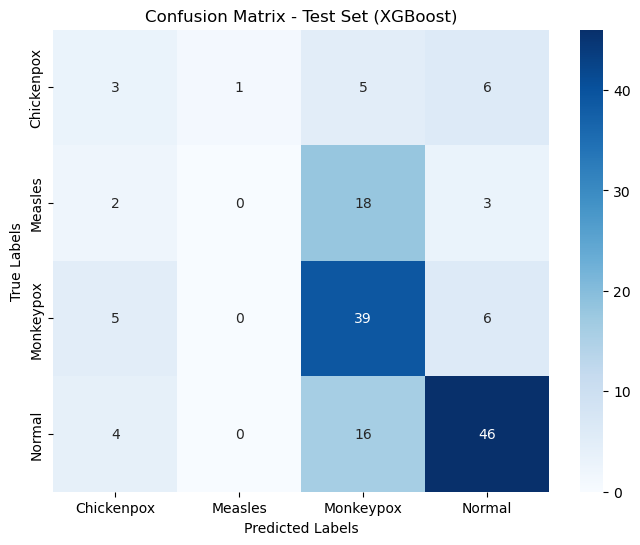

In [21]:
# 4. XGBoost
print("XGBoost Classifier:")
xgboost_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
evaluate_classifier_with_validation(xgboost_classifier, "XGBoost", X_train, y_train_encoded, X_val, y_val_encoded, X_test, y_test_encoded)